## Imports

In [1]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import pickle
import joblib

In [2]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix,\
                             explained_variance_score, mean_squared_error, max_error, mean_absolute_error,\
                             root_mean_squared_error, median_absolute_error
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA, KernelPCA
# pas besoin de feature selection parce que pas beacoup de colonnes

import optuna

In [3]:
from ML.utils.utils import *
from ML.utils.Iso_data_handler import Iso_data_handler
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_trainer import Model_trainer
from ML.utils.Model_evaluator import Model_evaluator

## Data preparation

### Getting the data

In [4]:
iso_handler = Iso_data_handler("C:/Users/antoi/Code/unif/MA2/thesis/data/MIST_v1.2_vvcrit0.0_basic_isos/", 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'])

iso_df = iso_handler.full_iso_data_to_panda()
display(iso_df)

Reading dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


### Filtering on phases

In [5]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1165292,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1165293,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1165294,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1165295,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


In [6]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=1337)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

(873972, 4) (291325, 4)
(873972, 2) (291325, 2)


In [7]:
print(f"Range in train data for the mass parameter : {min(y_train[:, 0])} - {max(y_train[:, 0])}")
print(f"Median value in train data for the mass parameter: {np.median(y_train[:, 0])}")
print(f"Mean value in train data for the mass parameter: {np.mean(y_train[:, 0])}")

print(f"Range in test data for the mass parameter : {min(y_ivs[:, 0])} - {max(y_ivs[:, 0])}")
print(f"Median value in test data for the mass parameter: {np.median(y_ivs[:, 0])}")
print(f"Mean value in test data for the mass parameter: {np.mean(y_ivs[:, 0])}")

print()

print(f"Range in train data for the radius parameter : {min(y_train[:, 1])} - {max(y_train[:, 1])}")
print(f"Median value in train data for the radius parameter: {np.median(y_train[:, 1])}")
print(f"Mean value in train data for the radius parameter: {np.mean(y_train[:, 1])}")

print(f"Range in test data for the radius parameter : {min(y_ivs[:, 1])} - {max(y_ivs[:, 1])}")
print(f"Median value in test data for the radius parameter: {np.median(y_ivs[:, 1])}")
print(f"Mean value in test data for the radius parameter: {np.mean(y_ivs[:, 1])}")


Range in train data for the mass parameter : 0.0999979840073621 - 296.5221171165397
Median value in train data for the mass parameter: 2.0298876569807147
Mean value in train data for the mass parameter: 7.387582424532589
Range in test data for the mass parameter : 0.099998052173157 - 298.5447575808816
Median value in test data for the mass parameter: 2.031987247312461
Mean value in test data for the mass parameter: 7.403392070038954

Range in train data for the radius parameter : -2.085171571669866 - 3.1297545143214007
Median value in train data for the radius parameter: 1.4613315181026039
Mean value in train data for the radius parameter: 1.354546893277933
Range in test data for the radius parameter : -2.081830985668411 - 3.129269620812593
Median value in test data for the radius parameter: 1.457489869624725
Mean value in test data for the radius parameter: 1.3536920075771535


### Filtering on masses and phases

In [8]:
phase_mass_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], 'star_mass':('<', 30)})
display(phase_mass_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1105728,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1105729,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1105730,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1105731,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


In [9]:
X_train_mass, X_ivs_mass, y_train_mass, y_ivs_mass = \
    Data_preparator.split_data(phase_mass_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=1337)

print(X_train_mass.shape, X_ivs_mass.shape)
print(y_train_mass.shape, y_ivs_mass.shape)

(829299, 4) (276434, 4)
(829299, 2) (276434, 2)


In [10]:
print(f"Range in train data for the mass parameter : {min(y_train_mass[:, 0])} - {max(y_train_mass[:, 0])}")
print(f"Median value in train data for the mass parameter: {np.median(y_train_mass[:, 0])}")
print(f"Mean value in train data for the mass parameter: {np.mean(y_train_mass[:, 0])}")

print(f"Range in test data for the mass parameter : {min(y_ivs_mass[:, 0])} - {max(y_ivs_mass[:, 0])}")
print(f"Median value in test data for the mass parameter: {np.median(y_ivs_mass[:, 0])}")
print(f"Mean value in test data for the mass parameter: {np.mean(y_ivs_mass[:, 0])}")

print()

print(f"Range in train data for the radius parameter : {min(y_train_mass[:, 1])} - {max(y_train_mass[:, 1])}")
print(f"Median value in train data for the radius parameter: {np.median(y_train_mass[:, 1])}")
print(f"Mean value in train data for the radius parameter: {np.mean(y_train_mass[:, 1])}")

print(f"Range in test data for the radius parameter : {min(y_ivs_mass[:, 1])} - {max(y_ivs_mass[:, 1])}")
print(f"Median value in test data for the radius parameter: {np.median(y_ivs_mass[:, 1])}")
print(f"Mean value in test data for the radius parameter: {np.mean(y_ivs_mass[:, 1])}")


Range in train data for the mass parameter : 0.0999979840073621 - 29.999136881366123
Median value in train data for the mass parameter: 1.9047225616504784
Mean value in train data for the mass parameter: 3.7794084657885567
Range in test data for the mass parameter : 0.099998052173157 - 29.99765995263001
Median value in test data for the mass parameter: 1.9113123276427197
Mean value in test data for the mass parameter: 3.782756605640712

Range in train data for the radius parameter : -2.085171571669866 - 3.1297545143214007
Median value in train data for the radius parameter: 1.4586781496654344
Mean value in train data for the radius parameter: 1.3431338190493374
Range in test data for the radius parameter : -2.0797611943433547 - 3.1252095788165946
Median value in test data for the radius parameter: 1.471910293946708
Mean value in test data for the radius parameter: 1.3479451503057525


In [11]:
phase_mass_3_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], 'star_mass':('<', 3)}) # TODO à utiliser
display(phase_mass_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1105728,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1105729,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1105730,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1105731,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


In [12]:
X_train_mass_3, X_ivs_mass_3, y_train_mass_3, y_ivs_mass_3 = \
    Data_preparator.split_data(phase_mass_3_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=1337)

print(X_train_mass_3.shape, X_ivs_mass_3.shape)
print(y_train_mass_3.shape, y_ivs_mass_3.shape)

(562008, 4) (187337, 4)
(562008, 2) (187337, 2)


### PCA data preparation

In [13]:
X_train_pca, X_ivs_pca = Data_preparator.pca_preparation(X_train, X_ivs, verbose=True)

PC0 - Variance explained:  0.5934 - Total Variance:  0.5934
PC1 - Variance explained:  0.2337 - Total Variance:  0.8271
PC2 - Variance explained:  0.1685 - Total Variance:  0.9955
PC3 - Variance explained:  0.0045 - Total Variance:  1.0000

(873972, 4)


## Model training

sauvegarder les prédictions? prend beaucoup de place donc p-être pas mais en fait oui

changer l'entrainement de tous les modèles comme en dessous

faire ce que j'ai écrit comme todo au-dessus de la fonction kfold


### Linear model

#### Linear regression

In [14]:
lr_evaluator = Model_evaluator("linear_regression", path="C:/Users/antoi/Code/unif/MA2/thesis/results/K_fold/")

In [15]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, "C:/Users/antoi/Code/unif/MA2/thesis/predictions/K_fold", "Base", override=False, use_preds=True)


Base train data :


ValueError: This file contains pickled (object) data. If you trust the file you can load it unsafely using the `allow_pickle=` keyword argument or `pickle.load()`.


Mass_filtered_30 train data :
split 1 2 3 4 5 6 7 8 9 10 C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold/linear_regression/
C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold/linear_regression/

mass results:
RVE :  0.5878646816543681
RMSE :  3.232982781407986
MAE :  1.9929991323860332
MedAE :  1.1576493154762009
CORR :  0.7667233410895458
MAX_ER :  21.09307603945477
Percentiles : 
  75th percentile :  2.375373768720129
  90th percentile :  4.567478508223235
  95th percentile :  6.609823948013517
  99th percentile :  13.764967043234444



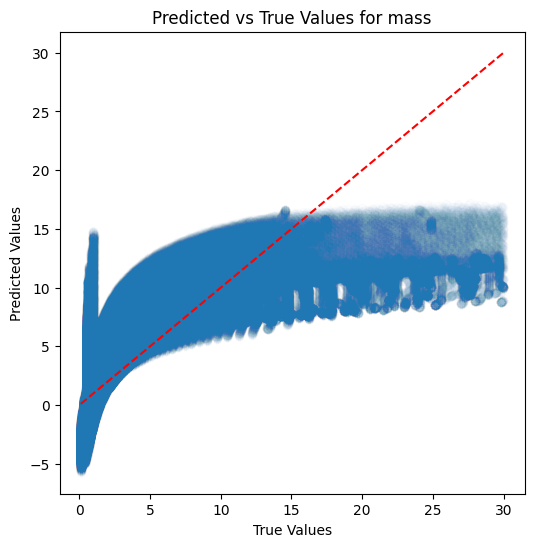

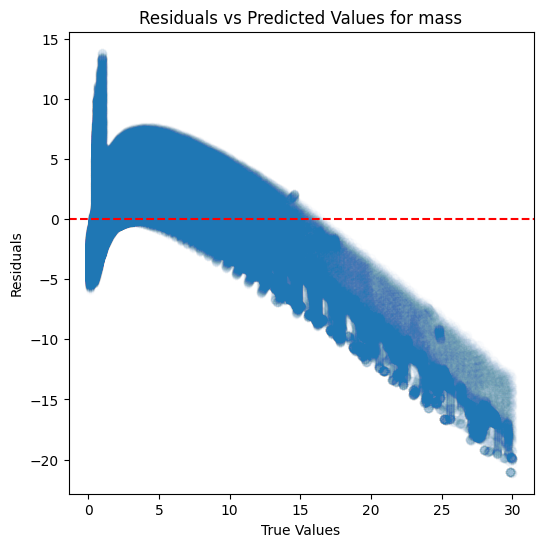

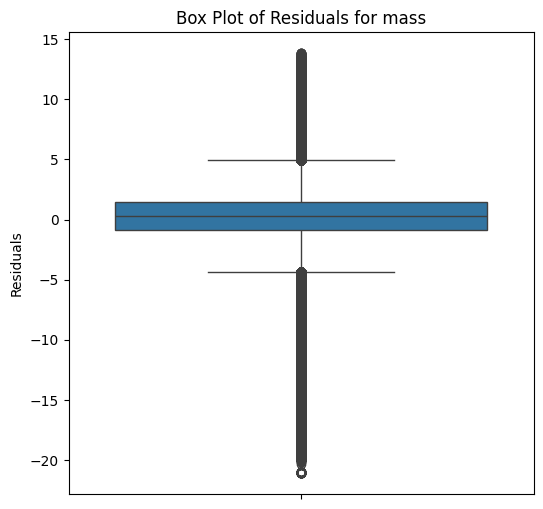

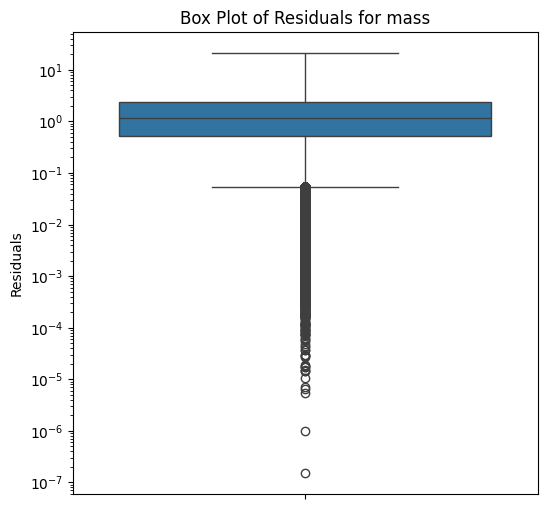

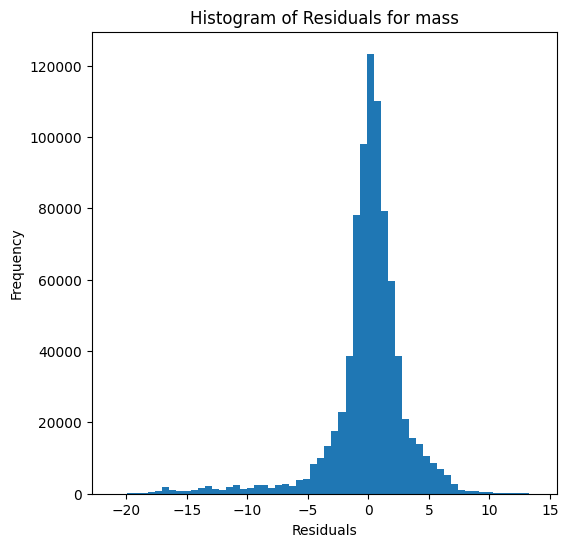

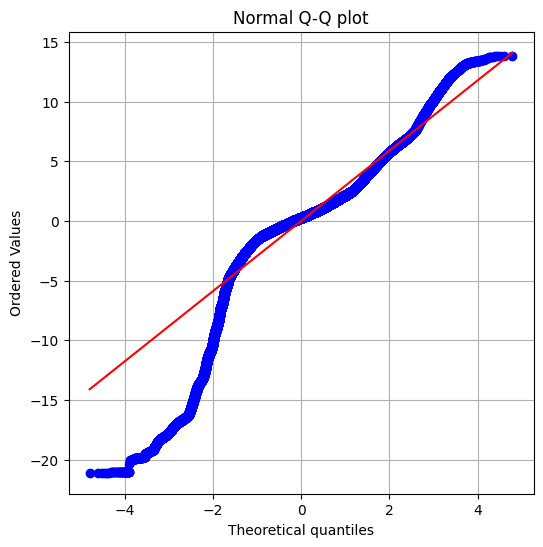


radius results:
RVE :  0.9906062913452259
RMSE :  0.09825809703866105
MAE :  0.07538368945089151
MedAE :  0.0612652568061649
CORR :  0.9952920633390131
MAX_ER :  0.5486142802172969
Percentiles : 
  75th percentile :  0.10025001696791114
  90th percentile :  0.15483218558972142
  95th percentile :  0.19776175558910475
  99th percentile :  0.30113593468777056



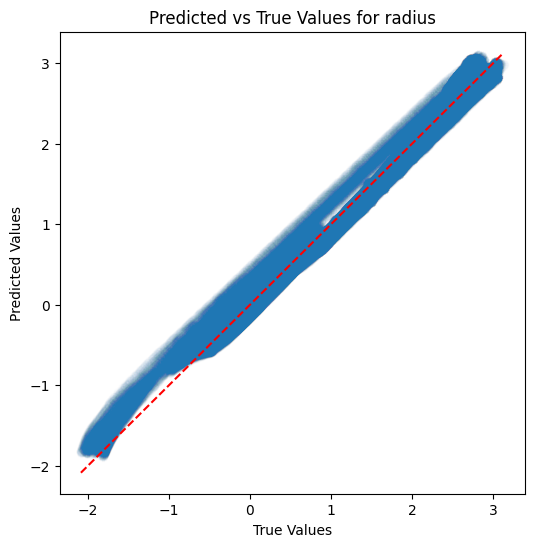

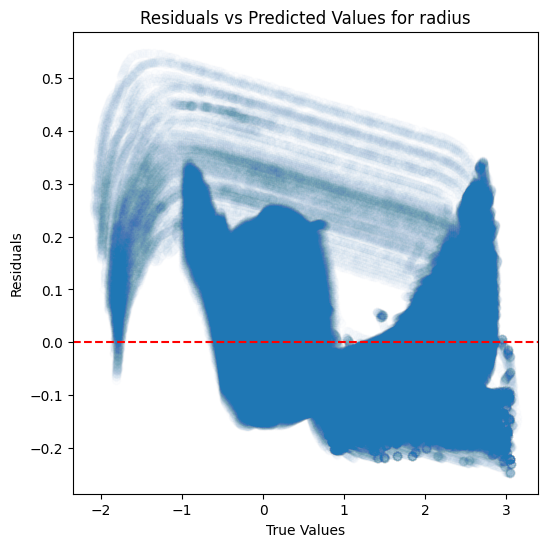

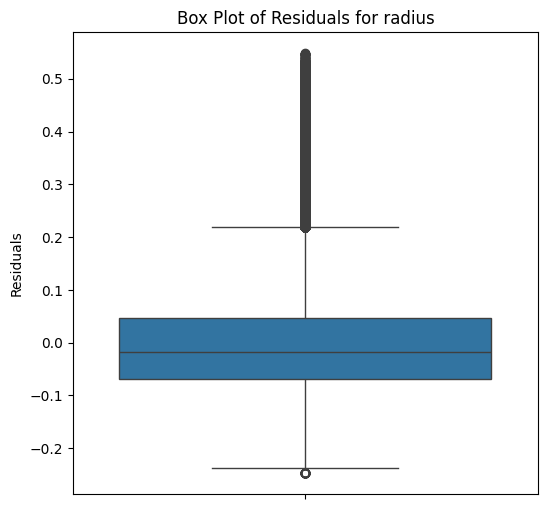

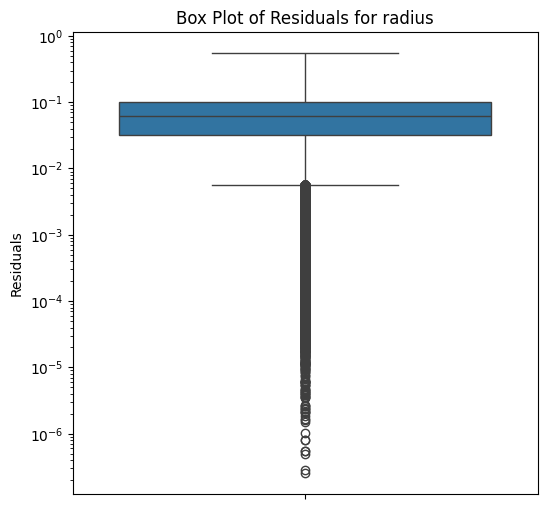

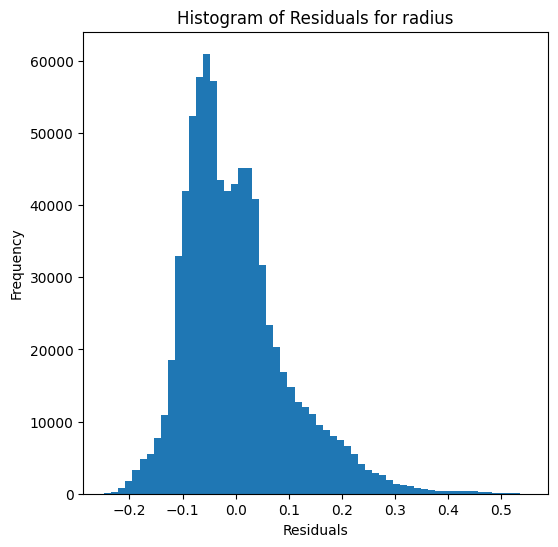

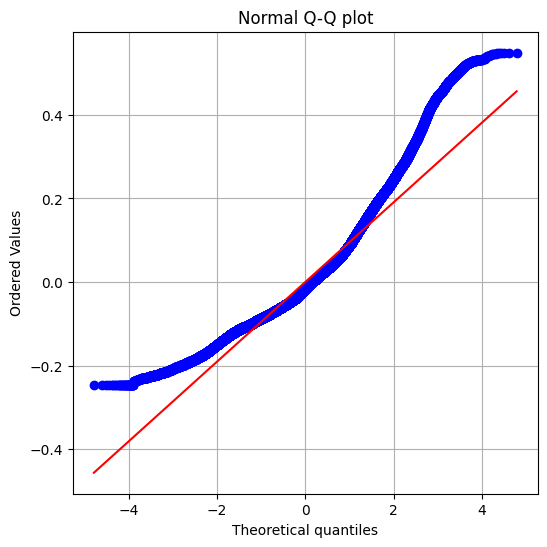

In [16]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train_mass, y_train_mass, "C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold", "Mass_filtered_30", override=True)


Mass_filtered_3 train data :
split 1 2 3 4 5 6 7 8 9 10 C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold/linear_regression/
C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold/linear_regression/

mass results:
RVE :  0.5336681878747425
RMSE :  0.47455757621963474
MAE :  0.3693155357530248
MedAE :  0.28167840006165545
CORR :  0.7305259666592452
MAX_ER :  1.6204572684800622
Percentiles : 
  75th percentile :  0.5288675830293221
  90th percentile :  0.8300655162057046
  95th percentile :  0.9896755436915752
  99th percentile :  1.2096979106956498



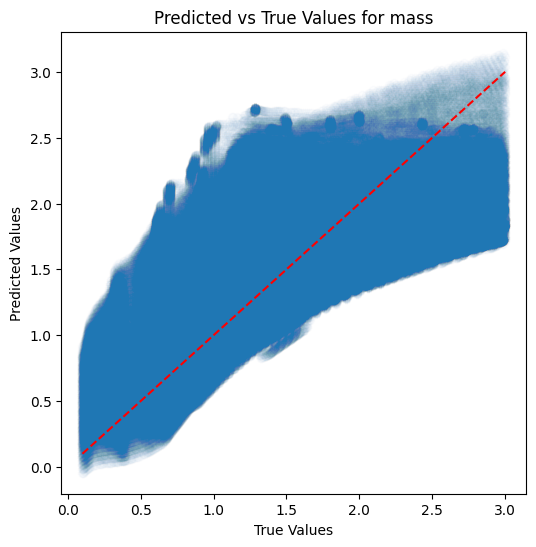

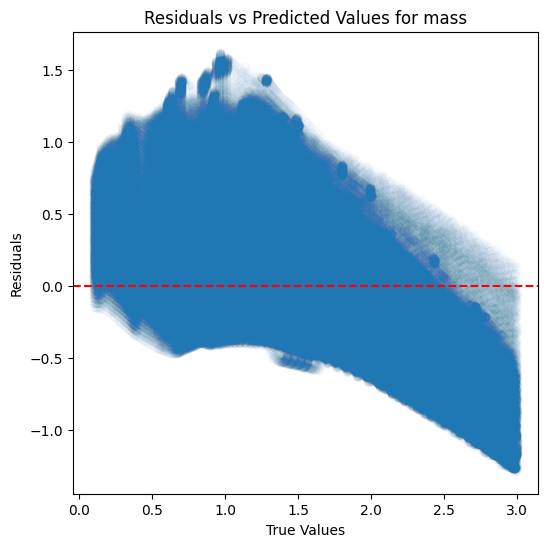

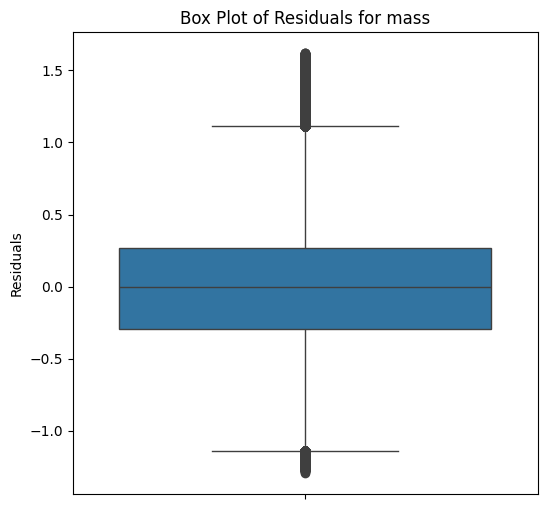

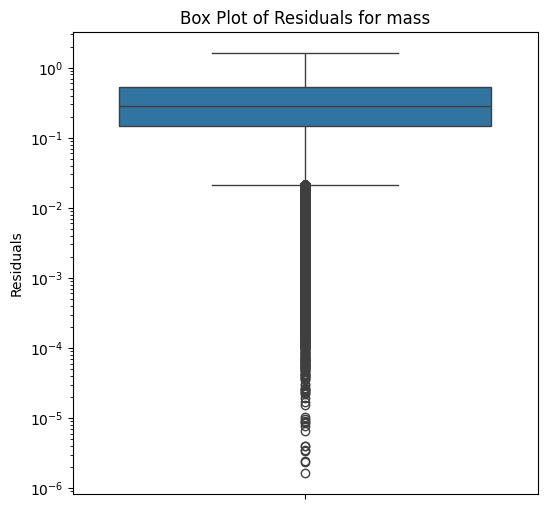

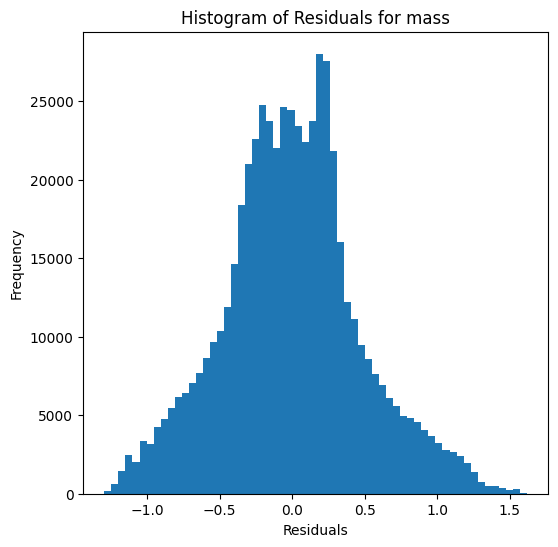

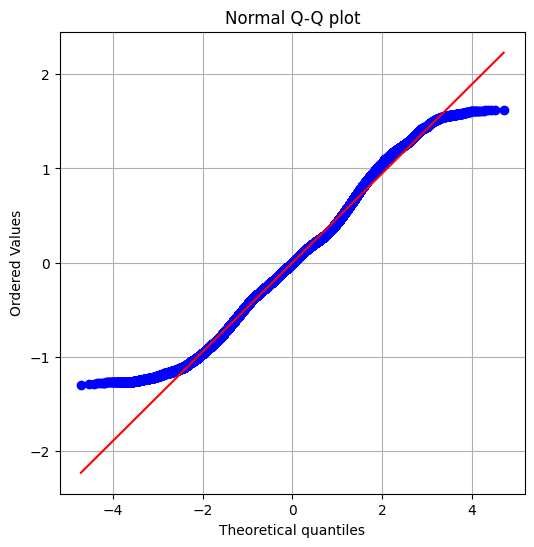


radius results:
RVE :  0.9938401785087972
RMSE :  0.08531020100313996
MAE :  0.06644968509002404
MedAE :  0.05634426877008081
CORR :  0.9969153316651141
MAX_ER :  0.3999800419167865
Percentiles : 
  75th percentile :  0.09155974171111247
  90th percentile :  0.12741443424107596
  95th percentile :  0.16854865261322552
  99th percentile :  0.2700624916277143



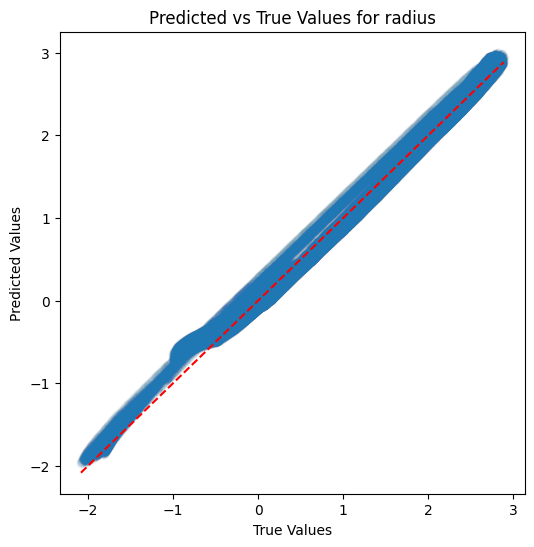

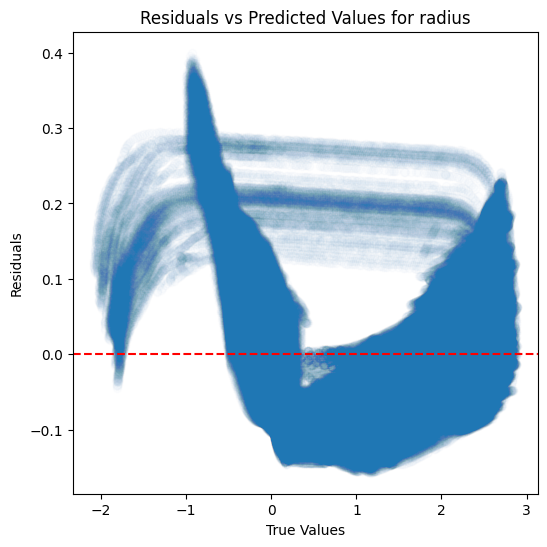

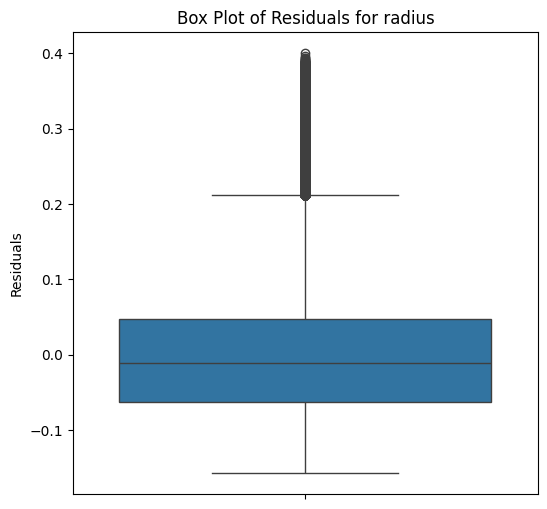

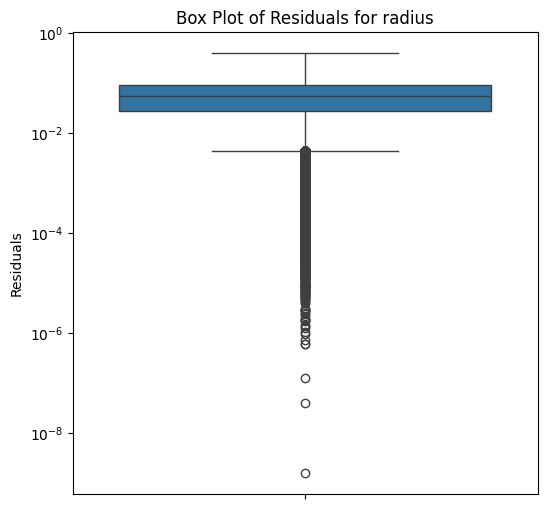

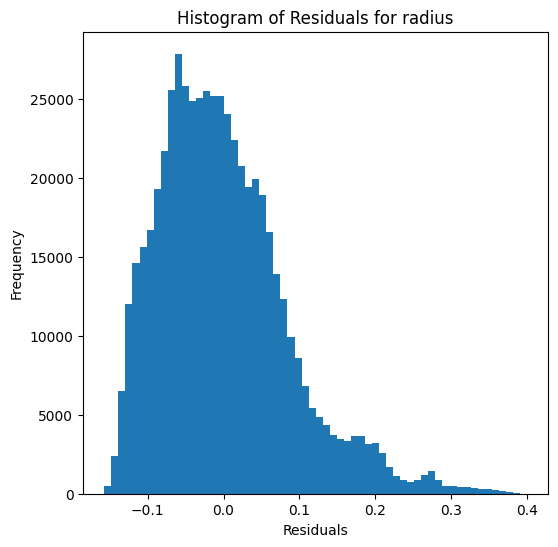

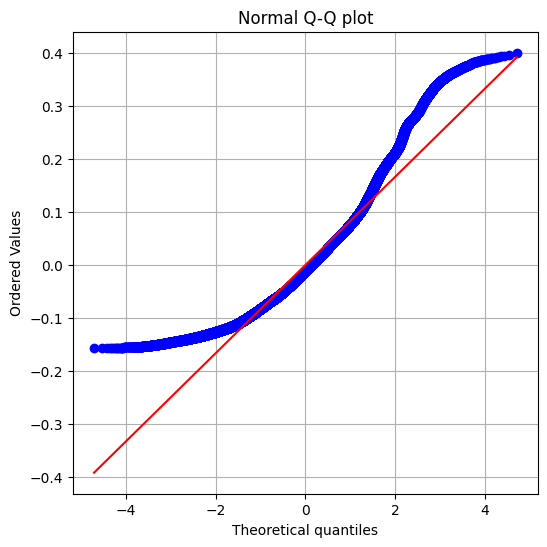

In [17]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train_mass_3, y_train_mass_3, "C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold", "Mass_filtered_3", override=True)


PCA train data :
split 1 2 3 4 5 6 7 8 9 10 C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold/linear_regression/
C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold/linear_regression/

mass results:
RVE :  0.3090177233167719
RMSE :  16.8380219478115
MAE :  7.3381699400817935
MedAE :  3.8262812442127645
CORR :  0.5558936261049733
MAX_ER :  261.3600452477993
Percentiles : 
  75th percentile :  8.601260025980169
  90th percentile :  14.298002851103636
  95th percentile :  18.76912741859748
  99th percentile :  70.22622147674694



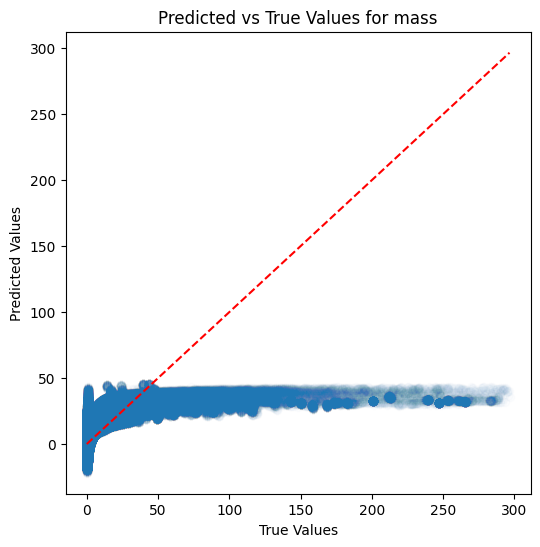

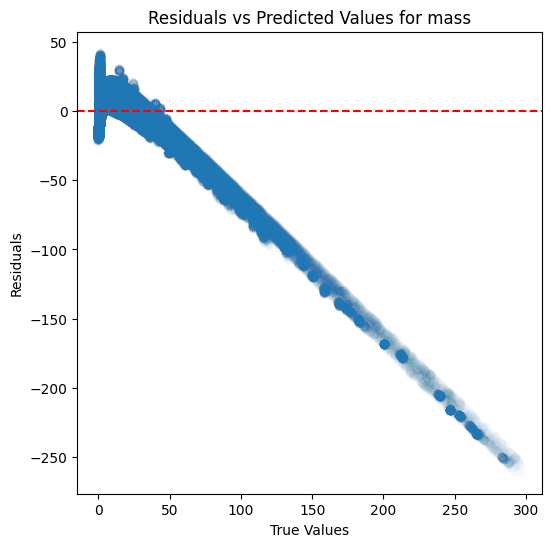

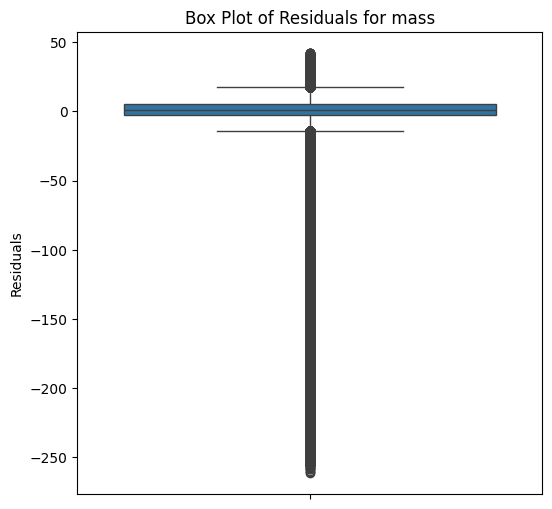

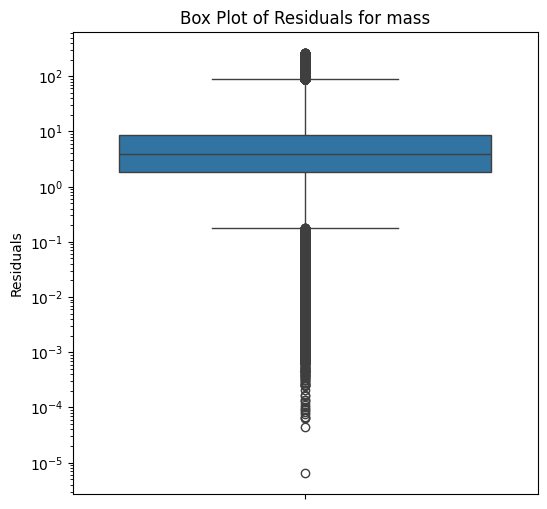

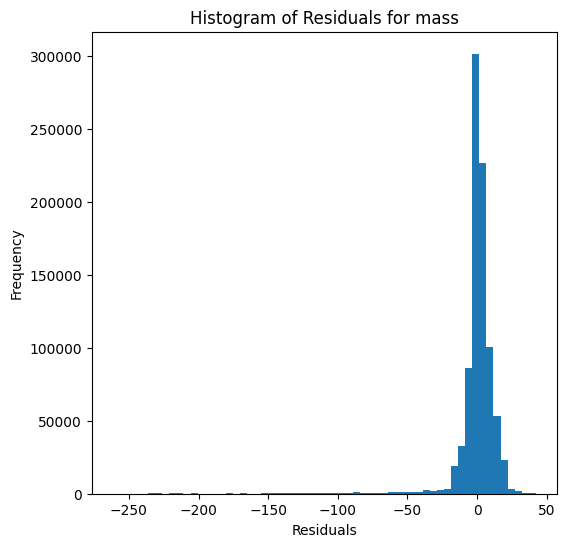

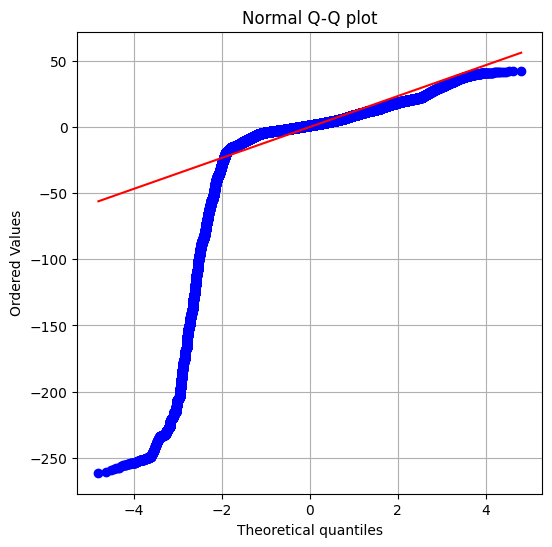


radius results:
RVE :  0.9873686629111135
RMSE :  0.11206075358433171
MAE :  0.0804839984613408
MedAE :  0.05785498467523276
CORR :  0.9936642606590922
MAX_ER :  0.6579405300155152
Percentiles : 
  75th percentile :  0.10398510485522772
  90th percentile :  0.1768269736929005
  95th percentile :  0.24184292167702914
  99th percentile :  0.382457386949836



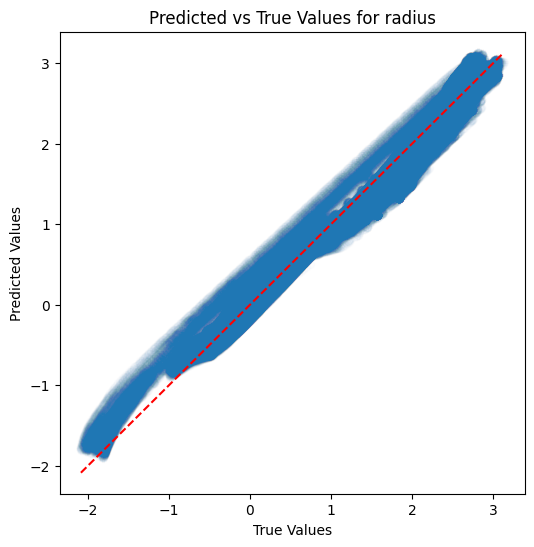

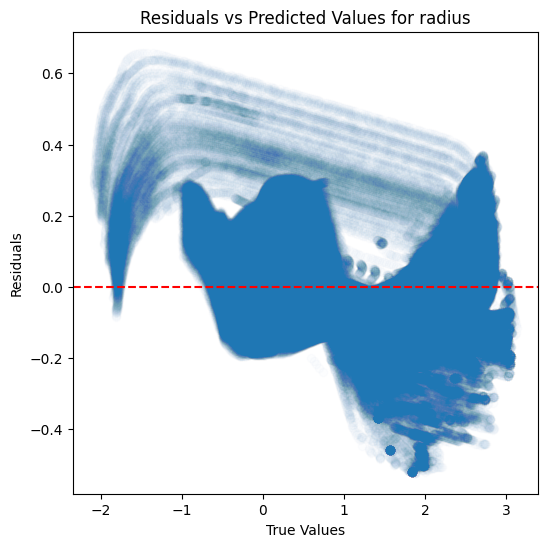

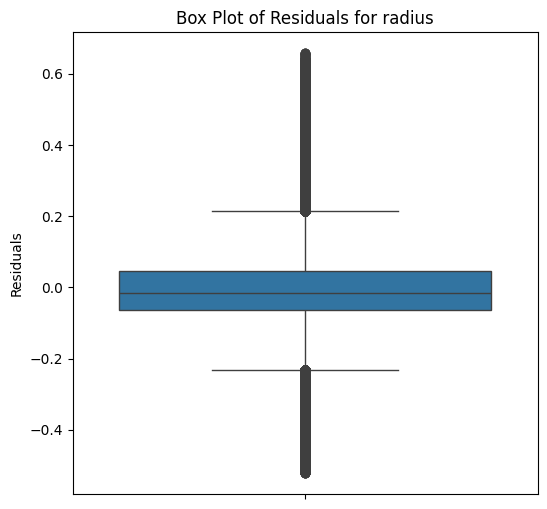

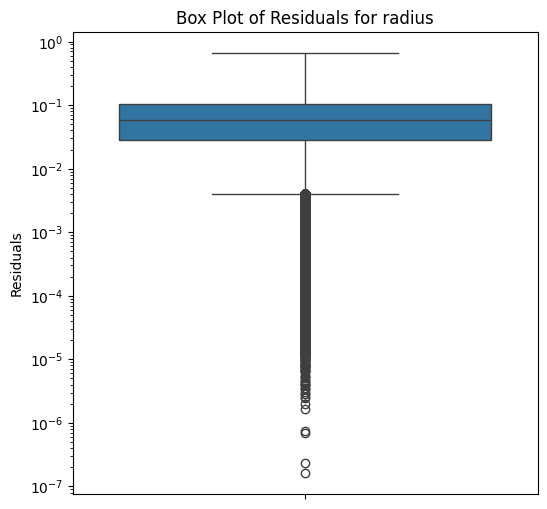

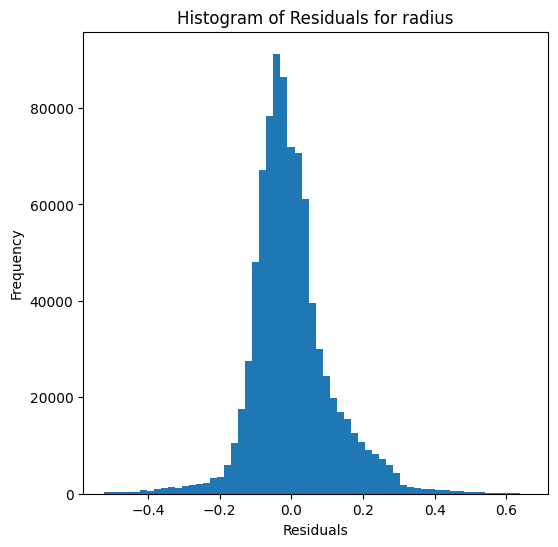

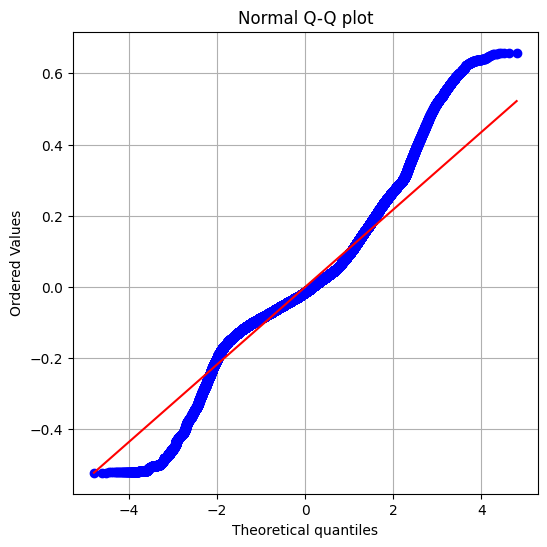

In [18]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train_pca, y_train, "C:/Users/antoi/Code/unif/MA2/Thèse/predictions/K_fold", "PCA", override=True)

#### Ridge

In [ ]:
print("Base train data :")
Kfold_pipeline(Ridge, x_train_data=X_TRAIN, y_train_data=y_TRAIN)
print("\nNo massive stars train data :")
Kfold_pipeline(Ridge, x_train_data=X_TRAIN_mass, y_train_data=y_TRAIN_mass)
print("\nPCA train data :")
Kfold_pipeline(Ridge, x_train_data=X_TRAIN_PCA, y_train_data=y_TRAIN)

### Decision tree regressor

In [ ]:
print("Base train data :")
Kfold_pipeline(DecisionTreeRegressor, x_train_data=X_TRAIN, y_train_data=y_TRAIN)
print("\nNo massive stars train data :")
Kfold_pipeline(DecisionTreeRegressor, x_train_data=X_TRAIN_mass, y_train_data=y_TRAIN_mass)
print("\nPCA train data :")
Kfold_pipeline(DecisionTreeRegressor, x_train_data=X_TRAIN_PCA, y_train_data=y_TRAIN)

### KNeighbours regressor

In [ ]:
print("Base train data :")
Kfold_pipeline(KNeighborsRegressor, x_train_data=X_TRAIN, y_train_data=y_TRAIN)
print("\nNo massive stars train data :")
Kfold_pipeline(KNeighborsRegressor, x_train_data=X_TRAIN_mass, y_train_data=y_TRAIN_mass)
print("\nPCA train data :")
Kfold_pipeline(KNeighborsRegressor, x_train_data=X_TRAIN_PCA, y_train_data=y_TRAIN)

### Support vector regressor

In [ ]:
print("Base train data :")
Kfold_pipeline(SVR, x_train_data=X_TRAIN, y_train_data=y_TRAIN)

### Random forest regressor

In [ ]:
# très long donc je teste juste sur 1 pour l'instant
# Kfold_pipeline(RandomForestRegressor)
print("Base train data :")
Kfold_pipeline(RandomForestRegressor, x_train_data=X_TRAIN, y_train_data=y_TRAIN)
print("\nNo massive stars train data :")
Kfold_pipeline(RandomForestRegressor, x_train_data=X_TRAIN_mass, y_train_data=y_TRAIN_mass)
print("\nPCA train data :")
Kfold_pipeline(RandomForestRegressor, x_train_data=X_TRAIN_PCA, y_train_data=y_TRAIN)

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=12)
TRUTH_MASS=None
TRUTH_RADIUS=None
PREDS_MASS=None
PREDS_RADIUS=None
counter = 0
print("split", end=' ')
for train_index, test_index in kf.split(X_TRAIN):
    counter += 1
    print(str(counter), end=' ')
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]

    mdl = RandomForestRegressor()
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)

    if TRUTH_MASS is None:
        PREDS_MASS=preds[:, 0]
        TRUTH_MASS=y_test[:, 0]
    else:
        PREDS_MASS=np.hstack((PREDS_MASS, preds[:, 0]))
        TRUTH_MASS=np.hstack((TRUTH_MASS, y_test[:, 0]))

    if TRUTH_RADIUS is None:
        PREDS_RADIUS=preds[:, 1]
        TRUTH_RADIUS=y_test[:, 1]
    else:
        PREDS_RADIUS=np.hstack((PREDS_RADIUS, preds[:, 1]))
        TRUTH_RADIUS=np.hstack((TRUTH_RADIUS, y_test[:, 1]))
    break

print()
print("Mass results:")
print("RVE: ",explained_variance_score(TRUTH_MASS, PREDS_MASS))
print("RMSE: ",root_mean_squared_error(TRUTH_MASS, PREDS_MASS))
corr, pval=pearsonr(TRUTH_MASS, PREDS_MASS)
print("CORR: ",corr)
print("PVAL: ",pval)
print("MAX_ER: ",max_error(TRUTH_MASS, PREDS_MASS))
print("MEAN_ABS_ER: ",mean_absolute_error(TRUTH_MASS, PREDS_MASS))  
print("MEDIAN_ABS_ER: ",median_absolute_error(TRUTH_MASS, PREDS_MASS))

print()
print("Radius results")
print("RVE: ",explained_variance_score(TRUTH_RADIUS, PREDS_RADIUS))
print("RMSE: ",root_mean_squared_error(TRUTH_RADIUS, PREDS_RADIUS))
corr, pval=pearsonr(TRUTH_RADIUS, PREDS_RADIUS)
print("CORR: ",corr)
print("PVAL: ",pval)
print("MAX_ER: ",max_error(TRUTH_RADIUS, PREDS_RADIUS))
print("MEAN_ABS_ER: ",mean_absolute_error(TRUTH_RADIUS, PREDS_RADIUS))  
print("MEDIAN_ABS_ER: ",median_absolute_error(TRUTH_RADIUS, PREDS_RADIUS))

### Adaboost regressor

In [ ]:
Kfold_pipeline(AdaBoostRegressor)

### XGB regressor

In [ ]:
print("Base train data :")
Kfold_pipeline(XGBRegressor, x_train_data=X_TRAIN, y_train_data=y_TRAIN)
print("\nNo massive stars train data :")
Kfold_pipeline(XGBRegressor, x_train_data=X_TRAIN_mass, y_train_data=y_TRAIN_mass)
print("\nPCA train data :")
Kfold_pipeline(XGBRegressor, x_train_data=X_TRAIN_PCA, y_train_data=y_TRAIN)

### MLP regressor

In [ ]:
# Trééééés long, 30 minutes pour 1 split
print("Base train data :")
Kfold_pipeline(MLPRegressor, x_train_data=X_TRAIN, y_train_data=y_TRAIN)
print("\nNo massive stars train data :")
Kfold_pipeline(MLPRegressor, x_train_data=X_TRAIN_mass, y_train_data=y_TRAIN_mass)
print("\nPCA train data :")
Kfold_pipeline(MLPRegressor, x_train_data=X_TRAIN_PCA, y_train_data=y_TRAIN)

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=12)
TRUTH_MASS=None
TRUTH_RADIUS=None
PREDS_MASS=None
PREDS_RADIUS=None
counter = 0
print("split", end=' ')
for train_index, test_index in kf.split(X_TRAIN):
    counter += 1
    print(str(counter), end=' ')
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]

    mdl = MLPRegressor()
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)

    if TRUTH_MASS is None:
        PREDS_MASS=preds[:, 0]
        TRUTH_MASS=y_test[:, 0]
    else:
        PREDS_MASS=np.hstack((PREDS_MASS, preds[:, 0]))
        TRUTH_MASS=np.hstack((TRUTH_MASS, y_test[:, 0]))

    if TRUTH_RADIUS is None:
        PREDS_RADIUS=preds[:, 1]
        TRUTH_RADIUS=y_test[:, 1]
    else:
        PREDS_RADIUS=np.hstack((PREDS_RADIUS, preds[:, 1]))
        TRUTH_RADIUS=np.hstack((TRUTH_RADIUS, y_test[:, 1]))
    break

print()
print("Mass results:")
print("RVE: ",explained_variance_score(TRUTH_MASS, PREDS_MASS))
print("RMSE: ",root_mean_squared_error(TRUTH_MASS, PREDS_MASS))
corr, pval=pearsonr(TRUTH_MASS, PREDS_MASS)
print("CORR: ",corr)
print("PVAL: ",pval)
print("MAX_ER: ",max_error(TRUTH_MASS, PREDS_MASS))
print("MEAN_ABS_ER: ",mean_absolute_error(TRUTH_MASS, PREDS_MASS))  
print("MEDIAN_ABS_ER: ",median_absolute_error(TRUTH_MASS, PREDS_MASS))

print()
print("Radius results")
print("RVE: ",explained_variance_score(TRUTH_RADIUS, PREDS_RADIUS))
print("RMSE: ",root_mean_squared_error(TRUTH_RADIUS, PREDS_RADIUS))
corr, pval=pearsonr(TRUTH_RADIUS, PREDS_RADIUS)
print("CORR: ",corr)
print("PVAL: ",pval)
print("MAX_ER: ",max_error(TRUTH_RADIUS, PREDS_RADIUS))
print("MEAN_ABS_ER: ",mean_absolute_error(TRUTH_RADIUS, PREDS_RADIUS))  
print("MEDIAN_ABS_ER: ",median_absolute_error(TRUTH_RADIUS, PREDS_RADIUS))

## Parameter tuning

In [ ]:
print(y_IVS)

In [ ]:
# Define the Optuna objective function
def objective(trial):
    # Hyperparameters to tune
    param = {
        'objective': 'reg:squarederror',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    
    # Train the XGBoost Classifier
    mdl = XGBRegressor(**param)
    mdl.fit(x_train, y_train, verbose=False)
    
    # Predict on validation set
    y_val_pred = mdl.predict(x_val)
    val_f1 = root_mean_squared_error(y_val, y_val_pred)
    
    return val_f1

x_train, x_val, y_train, y_val = train_test_split(X_TRAIN, y_TRAIN, test_size=0.25, random_state=1337)

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best parameters
mdl = XGBRegressor(
    **best_params
)
mdl.fit(X_TRAIN, y_TRAIN)

# Evaluate on test set
y_IVS_pred = mdl.predict(X_IVS)
TRUTH_MASS, PREDS_MASS = y_IVS[:, 0], y_IVS_pred[:, 0]
TRUTH_RADIUS, PREDS_RADIUS = y_IVS[:, 1], y_IVS_pred[:, 1]

print()
print("Mass results:")
print("RVE: ",explained_variance_score(TRUTH_MASS, PREDS_MASS))
print("RMSE: ",root_mean_squared_error(TRUTH_MASS, PREDS_MASS))
corr, pval=pearsonr(TRUTH_MASS, PREDS_MASS)
print("CORR: ",corr)
print("PVAL: ",pval)
print("MAX_ER: ",max_error(TRUTH_MASS, PREDS_MASS))
print("MEAN_ABS_ER: ",mean_absolute_error(TRUTH_MASS, PREDS_MASS))  
print("MEDIAN_ABS_ER: ",median_absolute_error(TRUTH_MASS, PREDS_MASS))

print()
print("Radius results")
print("RVE: ",explained_variance_score(TRUTH_RADIUS, PREDS_RADIUS))
print("RMSE: ",root_mean_squared_error(TRUTH_RADIUS, PREDS_RADIUS))
corr, pval=pearsonr(TRUTH_RADIUS, PREDS_RADIUS)
print("CORR: ",corr)
print("PVAL: ",pval)
print("MAX_ER: ",max_error(TRUTH_RADIUS, PREDS_RADIUS))
print("MEAN_ABS_ER: ",mean_absolute_error(TRUTH_RADIUS, PREDS_RADIUS))  
print("MEDIAN_ABS_ER: ",median_absolute_error(TRUTH_RADIUS, PREDS_RADIUS))

## Final model

In [ ]:
mdl = XGBRegressor(max_depth=9, learning_rate=0.29756705156191526, n_estimators=252, subsample=0.8981926120724242, colsample_bytree=0.8552677784958321)
mdl.fit(X, y)

joblib.dump(mdl, 'model/primary_XGB.pkl')

In [ ]:
print(X_IVS[0])
print(X_IVS[0].reshape(1, -1))

In [ ]:
test = mdl.predict([[ 9.2, 3.61857271, 5.00232111, -2.]])
print(test)

In [ ]:
test = mdl.predict(X_IVS[0].reshape(1, -1))
print(test)

In [ ]:
star_mass1, log_R1 = mdl.predict(X_IVS[0].reshape(1, -1)).flatten()
print(star_mass1, log_R1)